In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
winedata = pd.read_csv('winequality-red.csv')
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

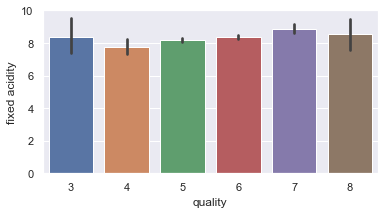

In [6]:
fig = plt.figure(figsize = (6,3))
sb.barplot(x="quality", y="fixed acidity", data=winedata)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

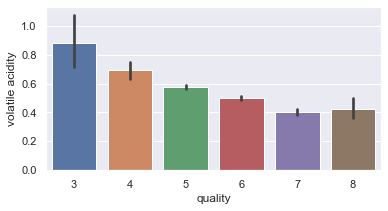

In [7]:
fig = plt.figure(figsize = (6,3))
sb.barplot(x="quality", y="volatile acidity", data=winedata)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

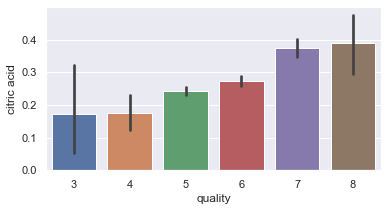

In [8]:
fig = plt.figure(figsize = (6,3))
sb.barplot(x="quality", y="citric acid", data=winedata)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

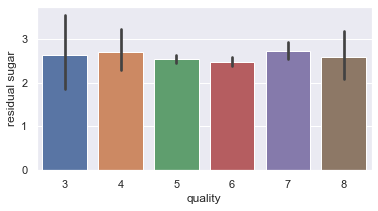

In [9]:
fig = plt.figure(figsize = (6,3))
sb.barplot(x="quality", y="residual sugar", data=winedata)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

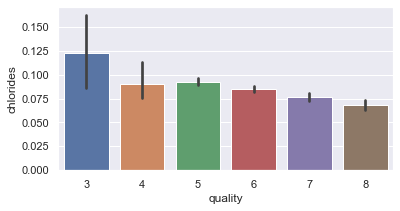

In [10]:
fig = plt.figure(figsize = (6,3))
sb.barplot(x="quality", y="chlorides", data=winedata)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

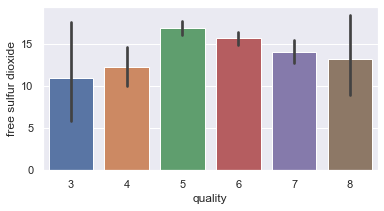

In [11]:
fig = plt.figure(figsize = (6,3))
sb.barplot(x="quality", y="free sulfur dioxide", data=winedata)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

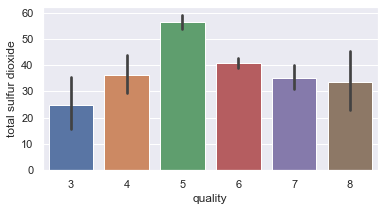

In [12]:
fig = plt.figure(figsize = (6,3))
sb.barplot(x="quality", y="total sulfur dioxide", data=winedata)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

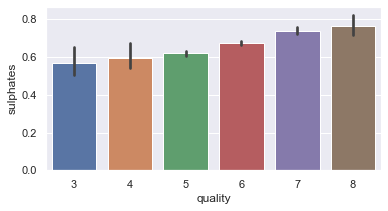

In [13]:
fig = plt.figure(figsize = (6,3))
sb.barplot(x="quality", y="sulphates", data=winedata)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

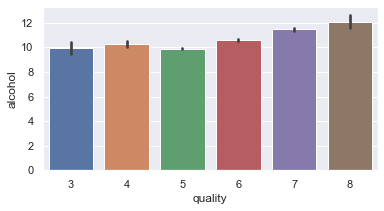

In [14]:
fig = plt.figure(figsize = (6,3))
sb.barplot(x="quality", y="alcohol", data=winedata)

<AxesSubplot:>

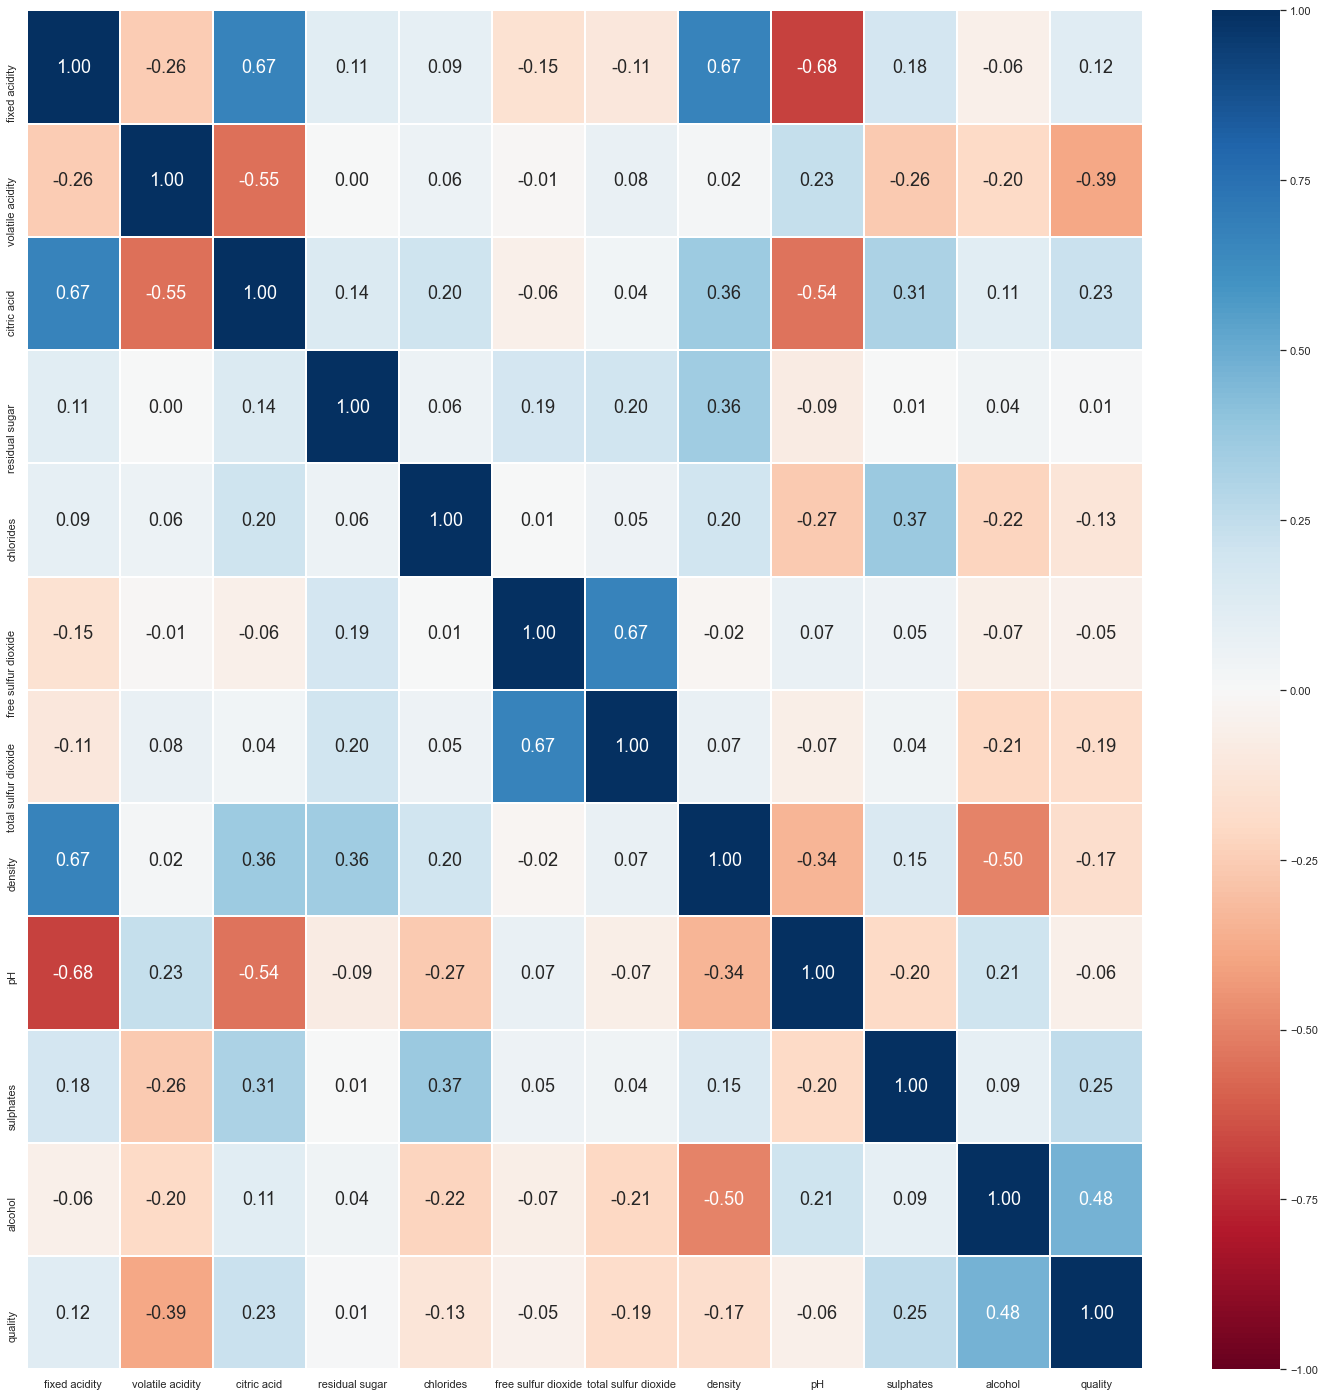

In [15]:
f = plt.figure(figsize=(25,25))
sb.heatmap(winedata.corr(), vmin=-1, vmax=1, linewidths=1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [37]:
new = []
for row in winedata['quality']:
    if (row <= 6):
        val = 'Bad'
    else:
        val = 'Good'
    new.append(val)

winedata['newquality'] = new

from collections import Counter
print(sorted(Counter(winedata['newquality']).items()))

[('Bad', 1382), ('Good', 217)]


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newquality', ylabel='count'>

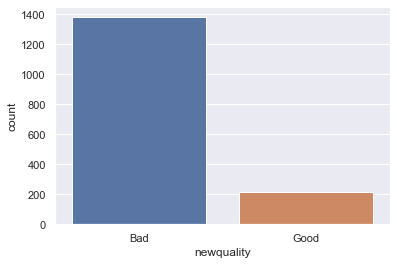

In [38]:
sb.countplot(winedata['newquality'])

In [39]:
X = winedata.drop(['quality', 'newquality'], axis = 1)
y = winedata['newquality']

In [40]:
from sklearn.model_selection import train_test_split
x_train1,x_test,y_train1,y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [41]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train1, y_train1)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newquality', ylabel='count'>

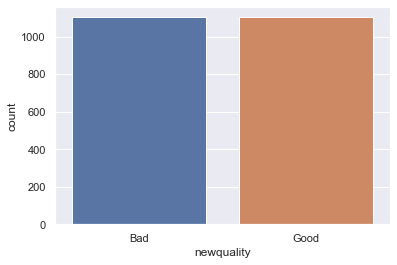

In [42]:
sb.countplot(y_train)

In [43]:
print(sorted(Counter(y_train).items()))

[('Bad', 1103), ('Good', 1103)]


train accuracy:  1.0 
 test accuracy:  0.84375


classification report for decision tree classifier
              precision    recall  f1-score   support

         Bad       0.86      0.96      0.91       251
        Good       0.73      0.43      0.55        69

    accuracy                           0.84       320
   macro avg       0.80      0.70      0.73       320
weighted avg       0.83      0.84      0.83       320



confusion matrix for decision tree classifier


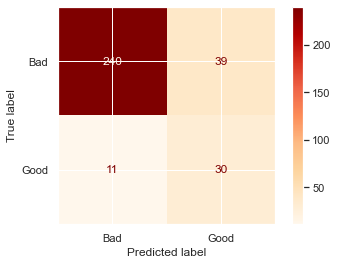

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import classification_report
#decision tree classifier
from sklearn.tree import plot_tree
dt = DecisionTreeClassifier()
model1 = dt.fit(x_train, y_train)


print("train accuracy: ", model1.score(x_train, y_train), "\n", "test accuracy: ", model1.score(x_test, y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred, y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dt, x_test, y_test, cmap = plt.cm.OrRd, values_format = 'd')

train accuracy: 1.0 
 test accuracy: 0.875


classification report for random forest classifier
              precision    recall  f1-score   support

         Bad       0.91      0.94      0.93       271
        Good       0.61      0.51      0.56        49

    accuracy                           0.88       320
   macro avg       0.76      0.73      0.74       320
weighted avg       0.87      0.88      0.87       320



confusion matrix for random forest classifier


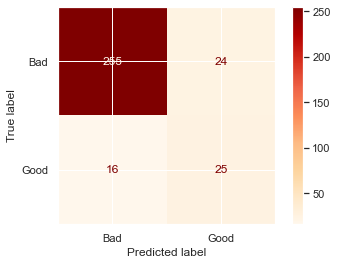

In [45]:
#random forest classifier
rf = RandomForestClassifier()
model2 = rf.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.84375


classification report for logistic regression
              precision    recall  f1-score   support

         Bad       0.81      0.96      0.88       234
        Good       0.78      0.37      0.50        86

    accuracy                           0.80       320
   macro avg       0.79      0.67      0.69       320
weighted avg       0.80      0.80      0.78       320



confusion matrix for logistic regression


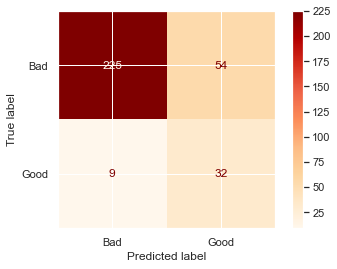

In [50]:
#logistic regression
lr = LogisticRegression(max_iter=20000,penalty='l2')
model3=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))

lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, x_test, y_test,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.886672710788758 
 test accuracy: 0.796875


classification report for adaboost classifier
              precision    recall  f1-score   support

         Bad       0.82      0.94      0.88       242
        Good       0.66      0.35      0.45        78

    accuracy                           0.80       320
   macro avg       0.74      0.64      0.66       320
weighted avg       0.78      0.80      0.77       320



confusion matrix for adaboost classifier


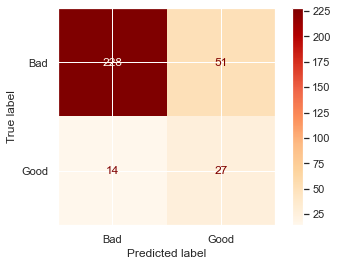

In [49]:
# adaboost classifier 
ada=AdaBoostClassifier()
model4=ada.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(ada, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7611060743427017 
 test accuracy: 0.65625


classification report for support vector classifier
              precision    recall  f1-score   support

         Bad       0.65      0.94      0.77       193
        Good       0.71      0.23      0.35       127

    accuracy                           0.66       320
   macro avg       0.68      0.58      0.56       320
weighted avg       0.67      0.66      0.60       320



confusion matrix for support vector classifier


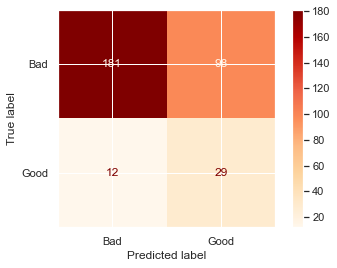

In [48]:
#support vector classifier
svc=SVC()
model5=svc.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

svcpred = svc.predict(x_test)
print("\n")
print("classification report for support vector classifier")
print(classification_report(svcpred,y_test))
print("\n")
print("confusion matrix for support vector classifier")
displr = plot_confusion_matrix(svc, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

<AxesSubplot:>

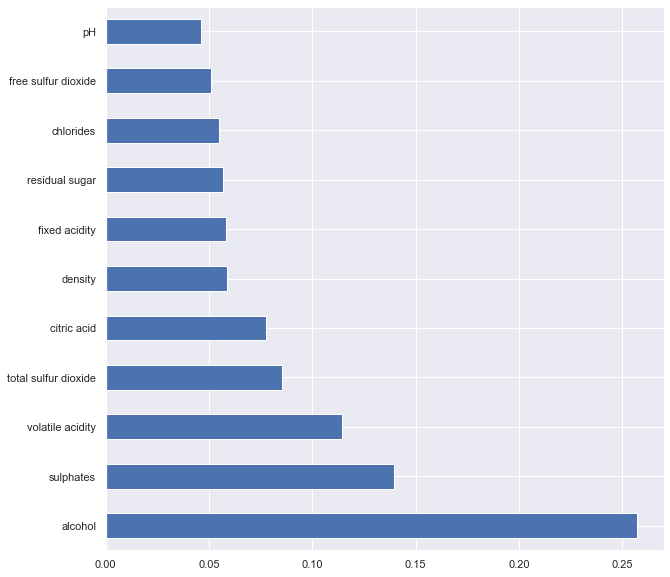

In [52]:
feat_importances = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))